In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
plt = matplotlib.pyplot

# Bias - Variance

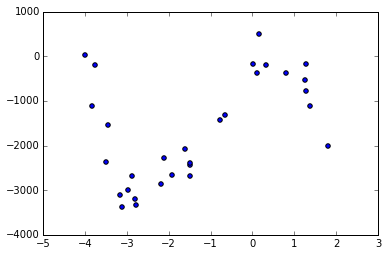

In [37]:
# Balance Varience & Bias
np.random.seed(1)
x = (np.random.random([30, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))
plt.scatter(x,y)
plt.show()

## Simple example

In [38]:
# the physical law says: S = 1/2 * F / M * t*2
# S: displacement, M: mass, F: force
# Let's say we know nothing about physics
# Given this data measure points: 
# (t, S) for N points, we want to predict for (t_new) what is S_new

In [39]:
ground_truth_coef = 1./2 * 10 / 2
t = np.random.random(10) * 3
#ground_truth_result = ground_truth_coef * t**2
ground_truth_result = ground_truth_coef * t ** 2


# plus measure error
measure_result = ground_truth_result + np.random.randn(10)*2

# for prediction
t_new = np.random.random(5)
#print ground_truth_result
#print ground_truth_result2

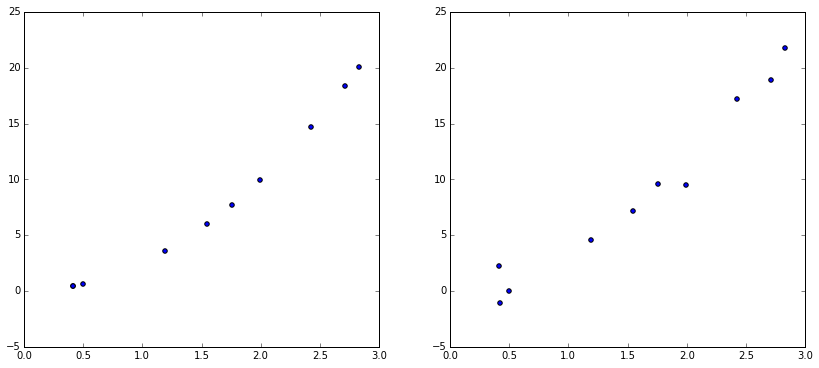

In [40]:
fig = plt.figure(figsize = (14, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(t, ground_truth_result)
# plt.scatter(t, ground_truth_result)

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(t, measure_result)
# plt.scatter(t, measure_result)


fig.show()

In [25]:
from sklearn import linear_model, metrics
lm_lr = linear_model.LinearRegression()

In [26]:
measure_result.shape

(10L,)

In [81]:
# Under fitting, what is the error? (using 1 order)
# we need to run it over multple times to see the difference
#np.random.seed(1)
N = 10000
error = []
for i in range(N):
    t = np.random.random(10) * 3
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + np.random.randn(10)*2
    t.resize([len(t), 1])
    
    lm_lr.fit(t, measure_result)
    
    t_new = np.random.random(5)
    ground_truth_result_new = ground_truth_coef * t_new**2
    t_new.resize([len(t_new), 1])
    y_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(ground_truth_result_new, y_pred))
    
error = np.array(error)

In [82]:
print error.mean(), error.std()

5.89033149921 8.90302094172


In [78]:
#np.random.seed(100)
print np.random.randn(1)
print np.random.randn(1)
print np.random.randn(1)


[ 0.61303888]
[ 0.73620521]
[ 1.02692144]


## Bias - Variance: model complexity

In [4]:
np.random.seed(1)
# x = np.linspace(-15,25,41)
# y = 2*x**3 - 30 * x **2 + 100*x + 1500 * np.random.randn(len(x))
# x = np.linspace(0, 6.14, 101)
# y = np.sin(x) + 0.3*np.random.randn(len(x))

X = []
t_score = []
v_score = []
for i in range(1,15):
    if i == 1:
        X.append(x.reshape(len(x), 1))
    else:
        X.append(np.hstack([X[-1], x.reshape(len(x), 1) ** i]))
    
    t_score.append([])
    v_score.append([])
    for j in range(1000):
        x_train, x_test, y_train, y_test = cross_validation.train_test_split(
            X[-1], y, test_size=0.2, random_state=j)
        rlm = linear_model.LinearRegression()
        rlm.fit(x_train, y_train)
        #print rlm.coef_, rlm.intercept_
        t_score[-1].append(metrics.mean_squared_error(y_train, rlm.predict(x_train)))
        v_score[-1].append(metrics.mean_squared_error(y_test, rlm.predict(x_test)))

/Users/AlanLiu/python2/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [5]:
t_score = np.array(t_score)
v_score = np.array(v_score)

In [ ]:
# Q1. Under ALL circumstances, is it that the more complicated a model is, the lower training error? 
# Q2. Under ALL circumstances, is it that the more complicated a model is, the lower testing error? 
# Q3. How does standard deviation looks like for both training & testing errors

In [6]:
t_score[:10]

array([[  972418.89952381,  1058595.97434229,  1039200.23251047, ...,
         1028302.60715634,   897938.30063624,   993381.39820886],
       [  942869.04020241,   832195.63042326,   800801.35375054, ...,
          857576.0967258 ,   842230.25793447,   695302.65599724],
       [  147986.98228416,   151585.34862834,   155616.90488634, ...,
          110277.54044671,   132796.32346196,   140644.80344197],
       ..., 
       [   77844.27664604,    83520.46229572,    85019.58101834, ...,
           85898.13120611,   107619.79125683,    57338.52118547],
       [   62633.81945856,    83383.73908945,    84531.67846977, ...,
           85843.62313438,    96884.57567916,    56332.36566498],
       [   57388.9447545 ,    81531.55887399,    79546.01165405, ...,
           69468.50588485,    96322.96196322,    54875.22364559]])

In [6]:
np.std(t_score), np.std(v_score)

(310026.81937409757, 3839877383664.6904)

In [ ]:
# under fit vs over fit
# In home work: model complexity
# Here: data points

## Bias - Variance: data size

In [7]:
data = datasets.make_regression(n_samples=1000, n_features=100, n_informative=2, noise=100)
X = data[0]
Y = data[1]
print X.shape, Y.shape

(1000, 100) (1000,)


In [8]:
ts_range = np.arange(0.05, 1, 0.05)
N_run = 50
t_score = []
v_score = []
for train_s in ts_range:
    t_score.append([])
    v_score.append([])
    for iseed in range(N_run):
        X1, X2, Y1, Y2 = cross_validation.train_test_split(X, Y, train_size=train_s, random_state=iseed)
        rlm = linear_model.LinearRegression()
        rlm.fit(X1, Y1)
        t_score[-1].append(metrics.r2_score(Y1, rlm.predict(X1)))
        v_score[-1].append(metrics.r2_score(Y2, rlm.predict(X2)))
    # print train_s

In [9]:
t_score = np.array(t_score)
v_score = np.array(v_score)

/Users/AlanLiu/python2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


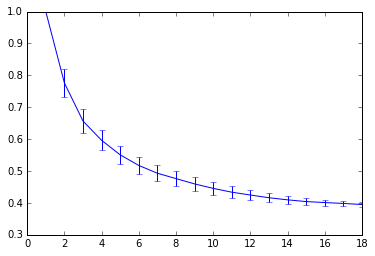

In [10]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])
y = t_score.mean(axis=1)
s = t_score.std(axis=1)
ax.errorbar(x, y, yerr=s)
fig.show()

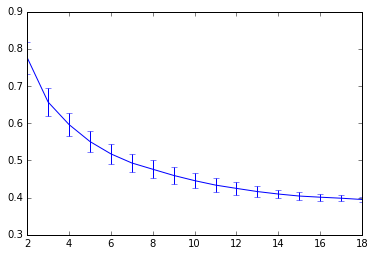

In [11]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])[2:]
y = t_score.mean(axis=1)[2:]
s = t_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s)
fig.show()

In [ ]:
# Run massive example
# large feature, small dataset
# small feature, large dataset
# Q. do we need to get more data? 

In [ ]:
# Exercise: package the above two code into functions, and then try use n_inform=2 and point=10000
# explore the training score & validation score relationship

In [ ]:
#t_score, v_score = run_example(1000, 2, error=10)
#plot_result(t_score,0)

In [12]:
from sklearn import learning_curve

In [13]:
learning_curve.learning_curve?

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve

1 loop, best of 3: 5.67 s per loop


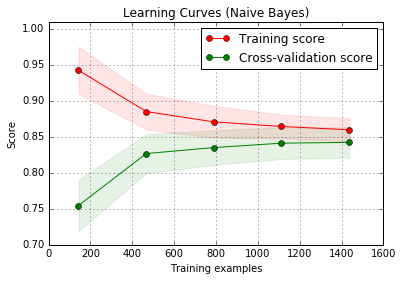

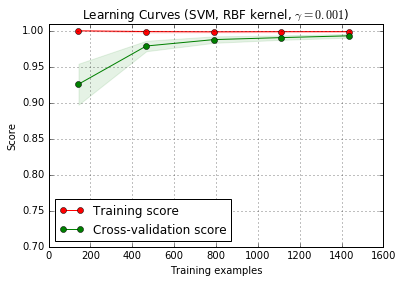

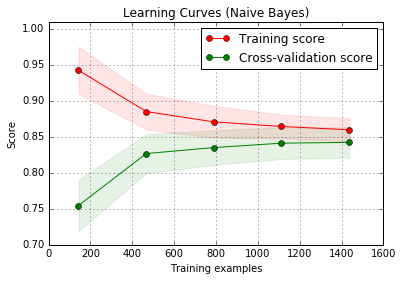

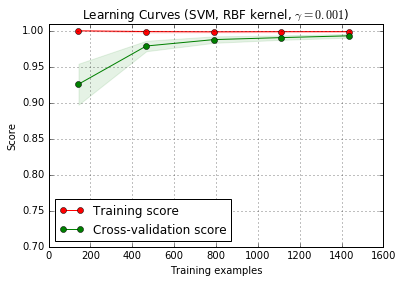

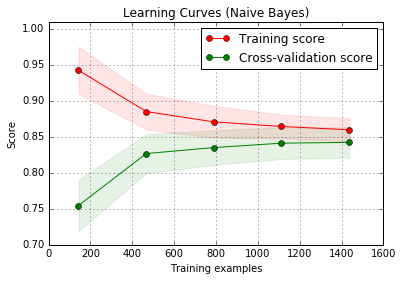

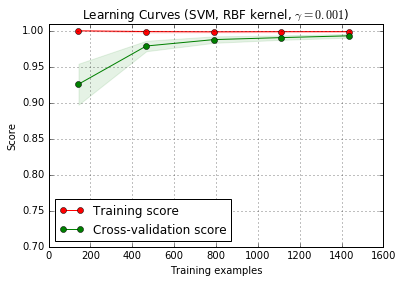

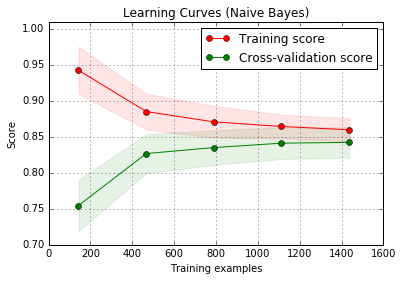

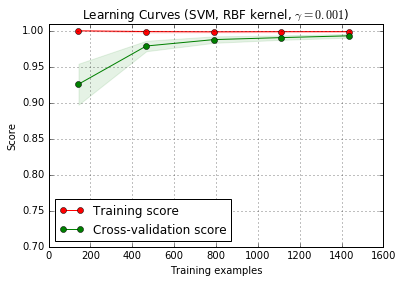

In [15]:
%%timeit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

# plt.show()

1 loop, best of 3: 10.2 s per loop


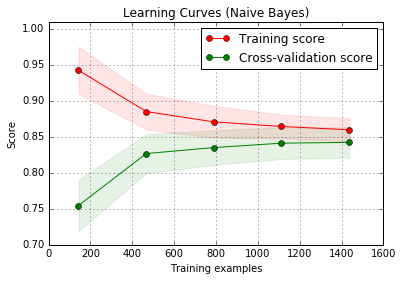

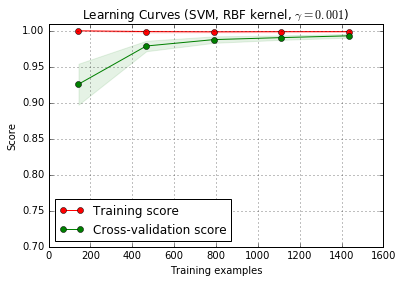

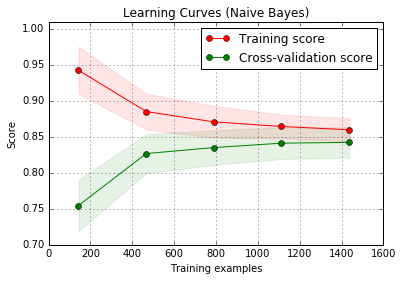

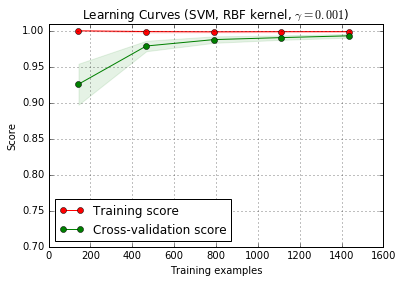

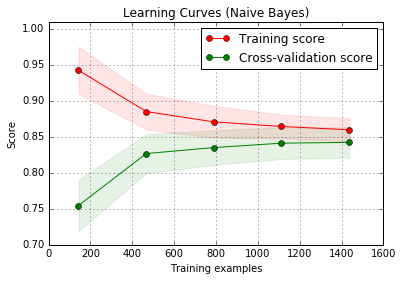

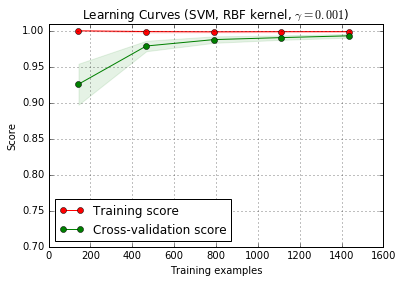

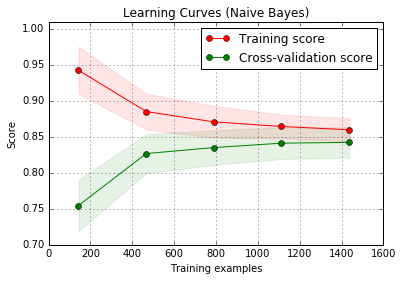

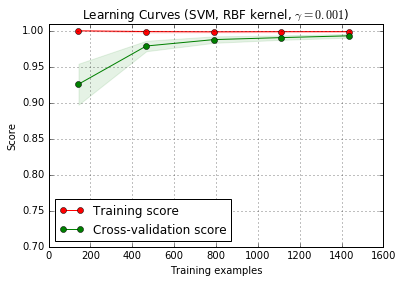

In [19]:
%%timeit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=1)

# plt.show()

In [ ]:
# Exercise: try different datasets, and understand how the bias & variance works

# Regression in-depth

## Ridge

In [ ]:
1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

In [ ]:
np.arange(0, 10)[:, np.newaxis]

In [ ]:
np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis]

In [ ]:
np.logspace(5,-1,5)

In [ ]:
np.power(10,3.5)

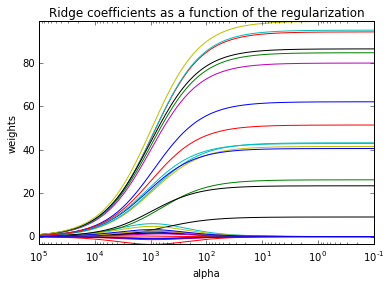

In [19]:
# X is the 10x10 Hilbert matrix
# X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# y = np.ones(10)
data = datasets.make_regression(n_samples=1000, n_features=30, n_informative=15, random_state=0)

X = data[0]
y = data[1]

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(5, -1,n_alphas)
clf = linear_model.Ridge()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
clf.score?

## Lasso

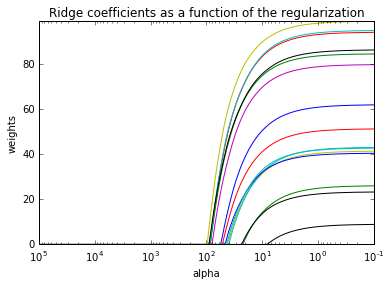

In [16]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.Lasso()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [17]:
# Excercise, run the regression over friedman datasets, see which variables are selected at different alpha
data = datasets.make_friedman1(random_state=0)
X = data[0]
y = data[1]

## Elastic Net

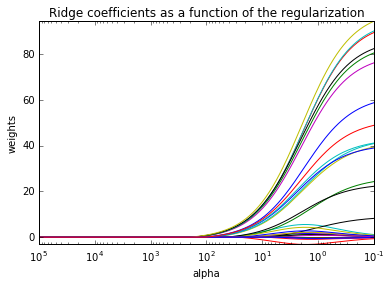

In [20]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.ElasticNet(l1_ratio=0.5)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Grid Search

In [21]:
from sklearn import grid_search

In [ ]:
np.logspace(-5, 5, 10)

In [22]:
lrg = linear_model.Lasso()
the_dict = {'alpha': np.logspace(-5, 5, 20)}
gs_lrg = grid_search.GridSearchCV(lrg, the_dict, cv=5)

In [23]:
gs_lrg.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-05,   3.35982e-05,   1.12884e-04,   3.79269e-04,
         1.27427e-03,   4.28133e-03,   1.43845e-02,   4.83293e-02,
         1.62378e-01,   5.45559e-01,   1.83298e+00,   6.15848e+00,
         2.06914e+01,   6.95193e+01,   2.33572e+02,   7.84760e+02,
         2.63665e+03,   8.85867e+03,   2.97635e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [ ]:
# Excercise
# Q1. what is the best parametr of linear regression for friedman1 datasets for Lasso and Ridge?
#     visualize how the coeficient changes along with parameters

# Hint: 
# 1. explore the available results (XX_) after .fit method runs
# 2. explore the type and available attributes for the available results


# Q2. How about elastic net?

## SGD

In [24]:
# Excercise, run the regression over friedman datasets, see which variables are selected at different alpha
data = datasets.make_regression(n_samples=10000, n_features=1000, n_informative=1000)
X = data[0]
y = data[1]

In [25]:
lrg = linear_model.LinearRegression()

In [26]:
%%time
lrg1 = linear_model.LinearRegression()
lrg1.fit(X, y)

CPU times: user 21.3 s, sys: 276 ms, total: 21.5 s
Wall time: 19.1 s


In [27]:
a = lrg1.coef_

In [28]:
%%time
lrg2 = linear_model.SGDRegressor()
lrg2.fit(X,y)

CPU times: user 170 ms, sys: 2.8 ms, total: 172 ms
Wall time: 175 ms


In [29]:
b = lrg2.coef_

In [ ]:
linear_model.SGDRegressor?

## Preprocessing

In [20]:
from sklearn import preprocessing

In [21]:
preprocessing.PolynomialFeatures?

In [22]:
# Balance Varience & Bias
np.random.seed(1)
x = (np.random.random([30, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))

In [23]:
pp_pf = preprocessing.PolynomialFeatures(degree=5)

In [33]:
pp_pf.fit_transform(x.reshape(30,1)).shape

(30, 6)

In [ ]:
datasets.load_boston?

In [ ]:
# Exercise: re-write the homework using the preprocessing module in Sklearn, do the work
# explore the bias & varience

# Classification Metrics

In [34]:
from sklearn import metrics

In [ ]:
# accuracy_score, precision_score, recall_score, f1_score, 
# confusion_matrix, classification_report

## confusion matrix

In [35]:
y_true = [1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2]
y_pred = [1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2]
# metrics.confusion_matrix(y_true, y_pred)

In [ ]:
#print metrics.accuracy_score(y_true, y_pred)
#print metrics.precision_score(y_true, y_pred)
#print metrics.recall_score(y_true, y_pred)

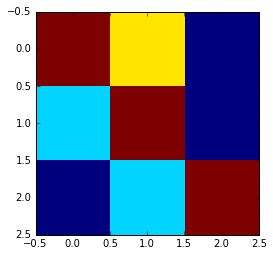

In [36]:
plt.imshow(metrics.confusion_matrix(y_true, y_pred), interpolation='nearest')

## ROC curve

In [37]:
y_true = [0, 1, 0, 1, 1, 1, 0, 0] # raw data
y_score = [0.2, 0.7, 0.6, 0.6, 0.5, 0.9, 0.4, 0.6] # problistic results
y_pred = [0, 1, 1, 1, 1, 1, 0, 1] # final prediction

In [38]:
# How ROC curvie is calculated?
# 0.9
y_true = [0, 1, 0, 1, 1, 1, 0, 0]
y_score = [0.2, 0.7, 0.6, 0.6, 0.5, 0.9, 0.4, 0.6]
y_pred = [0, 0, 0, 0, 0, 1, 0, 0]
print metrics.confusion_matrix(y_true, y_pred)
print metrics.recall_score(y_true, y_pred, pos_label=1), metrics.recall_score(y_true, y_pred,  pos_label=0)

[[4 0]
 [3 1]]
0.25 1.0


In [39]:
data = metrics.roc_curve(y_true, y_score)
data

(array([ 0. ,  0. ,  0.5,  0.5,  1. ]),
 array([ 0.25,  0.5 ,  0.75,  1.  ,  1.  ]),
 array([ 0.9,  0.7,  0.6,  0.5,  0.2]))

(-0.1, 1.1)

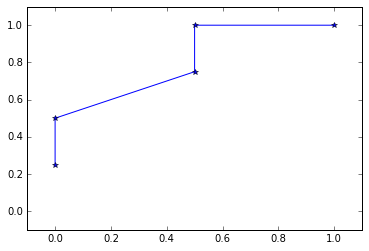

In [40]:
plt.plot(data[0], data[1], '*-')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

(-0.1, 1.1)

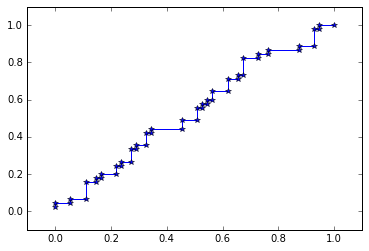

In [41]:
# create advanced learning algorithm & comparison
y_true = np.random.randint(0, 2, 100)
y_score = np.random.rand(100)

data = metrics.roc_curve(y_true, y_score)
plt.plot(data[0], data[1], '*-')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

In [ ]:
# Exercise: Can you design an advanced learning algorithm, and then run ROC over it?

In [42]:
metrics.roc_auc_score(y_true, y_score)

0.5385858585858585

In [43]:
print metrics.classification_report(y_true, y_pred)

ValueError: Found arrays with inconsistent numbers of samples: [  8 100]

# Classification Methods

## Logistic regression

In [ ]:
from sklearn import linear_model

In [ ]:
logrg = linear_model.LogisticRegression()

In [ ]:
# load iris data
# construct logistic regression

In [ ]:
# Excercise: visualize the confusion matrix & ROC curve (for each class respectively)

## Visualizing decision boundary

In [ ]:
x_min = -1.8
x_max = 7.2
y_min = -1.8
y_max = 7.2
h = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lrg.predict(np.array(zip(xx.ravel(), yy.ravel())))

# reshape, contourf

## Decision tree

In [ ]:
from sklearn import tree

In [ ]:
tree.

## SVM

In [ ]:
from sklearn import svm

In [ ]:
svm.LinearSVC?

In [ ]:
# Exercise: compare the performance for decision tree, SVM, and logistic regression over IRIS data